# Basic Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('/content/raw_house_data - raw_house_data.csv')

In [81]:
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

# Handling missing values

In [ ]:
#df = df.dropna()

In [67]:
#f = [c for c in df.columns if c not in ['kitchen_features','floor_covering']]
#df[f] = df[f].fillna(0)

In [82]:
df['kitchen_features'] = df['kitchen_features'].fillna('Others')
df['floor_covering'] = df['floor_covering'].fillna('Others')

In [83]:
df.dropna(subset=['sqrt_ft'], inplace=True)

In [84]:
df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


# Converting data types

In [85]:
df['sqrt_ft']=df['sqrt_ft'].astype('int')
df['sold_price']=df['sold_price'].astype('int')
df['HOA'] = pd.to_numeric(df['HOA'], errors='coerce')

#Dropping duplicates if any

In [86]:
df.drop_duplicates(inplace=True)

#Feature Engineering

## Calculating total rooms and dropping individual rooms later

In [87]:
df['total_rooms'] = df['bathrooms']+df['bedrooms']

In [88]:
df = df.drop(['bedrooms', 'bathrooms'],axis=1)

## Finding price per square feet

In [89]:
df['price_per_sqrtft'] = df['sold_price']/df['sqrt_ft']
df['price_per_sqrtft'] = pd.to_numeric(df['price_per_sqrtft'], errors='coerce')

In [90]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,total_rooms,price_per_sqrtft
0,21530491,5300000,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,23.0,504.761905
1,21529082,4200000,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,4.0,575.342466
3,21919321,4500000,85646,-111.035925,31.645878,636.67,8418.58,1930,9019,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN,12.0,498.946668
4,21306357,3411450,85750,-110.813768,32.285162,3.21,15393.00,1995,6396,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,10.0,533.372420
5,21528016,3250000,85718,-110.910593,32.339090,1.67,27802.84,1999,6842,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,7.0,475.007308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000,85641,-110.661829,31.907917,4.98,2017.00,2005,3601,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN,8.0,137.461816
4996,21908591,550000,85750,-110.858556,32.316373,1.42,4822.01,1990,2318,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0,7.0,237.273512
4997,21832452,475000,85192,-110.755428,32.964708,12.06,1000.00,1969,1772,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,NaN,5.0,268.058691
4998,21900515,550000,85745,-111.055528,32.296871,1.01,5822.93,2009,3724,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN,8.0,147.690655


#Handling inf values

In [91]:
pd.set_option('mode.use_inf_as_na', True)

<ipython-input-91-c240f4aa3757>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)


In [92]:
df['price_per_sqrtft'] = df['price_per_sqrtft'].replace(np.nan,0)

#Binning based on k=20

In [93]:
df["bins"] = pd.qcut(df["price_per_sqrtft"], q=20, labels=False)

In [94]:
df.to_csv('housing_clean_dataset.csv')

In [95]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,total_rooms,price_per_sqrtft,bins
0,21530491,5300000,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,23.0,504.761905,19
1,21529082,4200000,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,4.0,575.342466,19
3,21919321,4500000,85646,-111.035925,31.645878,636.67,8418.58,1930,9019,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN,12.0,498.946668,19
4,21306357,3411450,85750,-110.813768,32.285162,3.21,15393.00,1995,6396,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,10.0,533.372420,19
5,21528016,3250000,85718,-110.910593,32.339090,1.67,27802.84,1999,6842,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,7.0,475.007308,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000,85641,-110.661829,31.907917,4.98,2017.00,2005,3601,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN,8.0,137.461816,0
4996,21908591,550000,85750,-110.858556,32.316373,1.42,4822.01,1990,2318,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0,7.0,237.273512,15
4997,21832452,475000,85192,-110.755428,32.964708,12.06,1000.00,1969,1772,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,NaN,5.0,268.058691,17
4998,21900515,550000,85745,-111.055528,32.296871,1.01,5822.93,2009,3724,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN,8.0,147.690655,1


# Corelation heatmap between important features

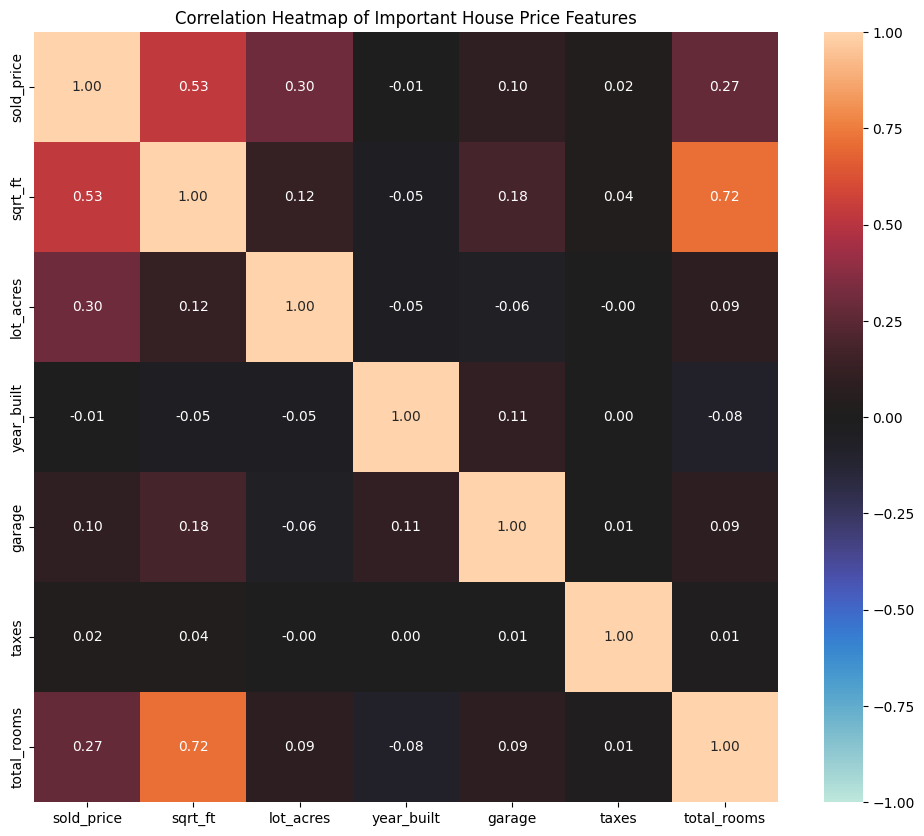

In [96]:
# Create correlation heatmap
important_features = ['sold_price', 'sqrt_ft', 'lot_acres', 'year_built', 'garage', 'taxes', 'total_rooms']

# Create a correlation matrix for the important features
corr_matrix = df[important_features].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Heatmap of Important House Price Features')
plt.show()

In [97]:
new_df=df[['longitude', 'latitude', 'bins']]

In [98]:
X_reg = new_df[['longitude', 'latitude']]

In [99]:
y_reg = new_df['bins']

In [100]:
X_reg = X_reg.to_numpy()

In [101]:
y_reg = y_reg.to_numpy()

In [102]:
X_reg

array([[-110.3782  ,   31.356362],
       [-111.045371,   31.594213],
       [-111.035925,   31.645878],
       ...,
       [-110.755428,   32.964708],
       [-111.055528,   32.296871],
       [-110.913054,   31.385259]])

In [103]:
y_reg

array([19, 19, 19, ..., 17,  1,  0])

#Slicing the full dataset into training data and testing data

In [104]:
ninety_pct = 0.9*new_df.shape[0]

X_train = new_df.loc[:ninety_pct-1, :]
X_test = new_df.loc[ninety_pct:, :]

X_train.shape, X_test.shape

((4400, 3), (543, 3))

In [105]:
X_train = X_train.to_numpy()

In [106]:
y_train = X_train[:,2]

In [107]:
y_train

array([19., 19., 19., ...,  9., 15.,  4.])

In [109]:
X_train = X_train[:,:2]

In [110]:
X_train

array([[-110.3782  ,   31.356362],
       [-111.045371,   31.594213],
       [-111.035925,   31.645878],
       ...,
       [-110.905723,   32.322266],
       [-110.908554,   32.318525],
       [-111.093134,   32.325606]])

# Min Max Scaling

In [113]:
X_train = X_train - X_train.min() / (X_train.max() - X_train.min())

In [114]:
X_train

array([[-108.85714078,   32.87742122],
       [-109.52431178,   33.11527222],
       [-109.51486578,   33.16693722],
       ...,
       [-109.38466378,   33.84332522],
       [-109.38749478,   33.83958422],
       [-109.57207478,   33.84666522]])

# Steps to be done with testing dataset

In [50]:
X_test = X_test.to_numpy()

In [51]:
y_test = X_test[:,2]

In [52]:
X_test = X_test[:,:2]

In [53]:
y_test

array([10., 16.,  0., 13.,  1.,  4., 12., 17.,  0.,  3.,  0.,  0., 13.,
        8.,  8.,  2.,  7., 15.,  0.,  1., 17., 16., 14., 13.,  2., 16.,
       16., 12., 11.,  7., 17.,  1., 11., 12., 18.,  5., 10.,  3.,  4.,
        4.,  3.,  6.,  5.,  3.,  1.,  4.,  4.,  1., 15., 13., 10.,  8.,
        4.,  8.,  5.,  7., 12.,  2., 15., 14., 13.,  4.,  9., 14., 13.,
        2., 10., 13.,  1.,  2.,  6.,  2.,  2.,  2.,  9., 16.,  1.,  9.,
        0., 14.,  7.,  0.,  3.,  1.,  1.,  2., 15., 16., 11.,  4., 14.,
       12.,  2.,  9.,  2.,  6.,  1.,  6.,  6.,  8.,  6.,  7.,  3., 13.,
       10., 11., 12.,  9.,  3.,  4.,  2.,  4.,  2.,  4.,  6.,  8.,  1.,
        9.,  3.,  6.,  2.,  1.,  6.,  4.,  0.,  1.,  1.,  9., 13.,  5.,
        8.,  9.,  7.,  8.,  1.,  1., 11.,  1.,  6.,  0., 10., 15.,  0.,
        6.,  5.,  5.,  3., 10.,  8.,  0.,  9.,  2., 16., 12.,  9., 10.,
        7., 15., 13., 17.,  2.,  0.,  0.,  2.,  1., 11., 13., 15., 10.,
       15.,  7.,  6.,  8.,  5., 12.,  0.,  3.,  6.,  5., 14.,  1

In [54]:
X_test

array([[-110.926335,   32.226495],
       [-110.852921,   32.321666],
       [-110.997849,   32.421307],
       [-110.87639 ,   32.262883],
       [-110.990132,   32.31739 ],
       [-110.955382,   32.311684],
       [-110.905893,   32.28437 ],
       [-110.969475,   32.208847],
       [-110.751977,   32.272649],
       [-111.043189,   32.277521],
       [-110.61689 ,   32.120348],
       [-111.038581,   32.44281 ],
       [-110.910695,   32.319105],
       [-110.883952,   32.319877],
       [-110.852498,   32.290601],
       [-111.096629,   32.338934],
       [-110.896435,   32.53479 ],
       [-110.863923,   32.29327 ],
       [-110.082311,   31.712638],
       [-110.729719,   32.264794],
       [-110.841888,   32.316124],
       [-110.93893 ,   32.235234],
       [-110.983838,   32.431258],
       [-110.941678,   32.33314 ],
       [-110.800121,   31.945523],
       [-110.939004,   32.240398],
       [-110.852535,   32.319957],
       [-110.872091,   32.309736],
       [-110.953046,

In [55]:
X_test = X_test - X_test.min() / (X_test.max() - X_test.min())

In [116]:
class KNNClassifier():

  def fit(self,X,y):
    self.X = X
    self.y = y.astype(int)

  def predict(self, X, K,epsilon=1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      dist2 = np.sum((self.X-X[i])**2, axis=1)
      idxt = np.argsort(dist2)[:K]
      gamma_k = 1/(np.sqrt(dist2[idxt]+epsilon))

      y_hat[i] = np.bincount(self.y[idxt], weights = gamma_k).argmax()

    return y_hat

In [118]:
knnr = KNNClassifier()
knnr.fit(X_train,y_train)

In [ ]:
knnr = KNNClassifier()
knnr.fit(X_reg,y_reg)

In [123]:
y_reg_hat = knnr.predict(X_reg,K=3)

In [124]:
y_reg_hat

array([ 0., 16., 16., ..., 16., 16.,  0.])

In [119]:
y_hat = knnr.predict(X_train,K=3)

In [56]:
y_hat_test = knnr.predict(X_test,K=3)

In [120]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [125]:
accuracy(y_reg, y_reg_hat)

0.05279126213592233

In [122]:
#Training dataset
accuracy(y_train,y_hat)

0.9079545454545455

In [126]:
#Testing dataset
accuracy(y_test,y_hat_test)

0.06

In [127]:
df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA,total_rooms,price_per_sqrtft,bins
0,21530491,5300000,85637,-110.378200,31.356362,2154.00,5272.00,1941,10500,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0,23.0,504.761905,19
1,21529082,4200000,85646,-111.045371,31.594213,1707.00,10422.36,1997,7300,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0,4.0,575.342466,19
3,21919321,4500000,85646,-111.035925,31.645878,636.67,8418.58,1930,9019,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",NaN,12.0,498.946668,19
4,21306357,3411450,85750,-110.813768,32.285162,3.21,15393.00,1995,6396,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0,10.0,533.372420,19
5,21528016,3250000,85718,-110.910593,32.339090,1.67,27802.84,1999,6842,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Natural Stone, Wood, Other",422.0,7.0,475.007308,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000,85641,-110.661829,31.907917,4.98,2017.00,2005,3601,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN,8.0,137.461816,0
4996,21908591,550000,85750,-110.858556,32.316373,1.42,4822.01,1990,2318,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0,7.0,237.273512,15
4997,21832452,475000,85192,-110.755428,32.964708,12.06,1000.00,1969,1772,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,NaN,5.0,268.058691,17
4998,21900515,550000,85745,-111.055528,32.296871,1.01,5822.93,2009,3724,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",NaN,8.0,147.690655,1


# Helpful functions

In [128]:
def MAE(Y, Y_hat):
  return np.sum(np.abs((Y-Y_hat)/Y))

def R2(Y,Y_hat):
  N=len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y,Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

In [129]:
class MVLinearRegression():

  def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape

    Y=y

    #Begin SGD optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent Progression
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y,Y_hat,N)
      # Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W

In [130]:
y_reg_hat

array([ 0., 16., 16., ..., 16., 16.,  0.])

In [131]:
bins_df = pd.DataFrame(y_reg_hat, columns = ['Price_sq_ft_bins'])

In [145]:
bins_df['Price_sq_ft_bins']=bins_df['Price_sq_ft_bins'].astype('int')

In [147]:
bins_df

,Price_sq_ft_bins
0,0
1,16
2,16
3,16
4,16
...,...
4939,4
4940,16
4941,16
4942,16


In [146]:
bins_df.isnull().sum()

,0
Price_sq_ft_bins,0


In [136]:
bins_df.dropna(subset=['Price_sq_ft_bins'], inplace=True)

In [151]:
bins_df = bins_df[~(bins_df == 0).all(axis=1)]


In [152]:
bins_df

,Price_sq_ft_bins
1,16
2,16
3,16
4,16
5,16
...,...
4938,16
4939,4
4940,16
4941,16


In [153]:
features = ['sold_price','sqrt_ft', 'lot_acres']

In [ ]:
features

['sold_price', 'sqrt_ft', 'lot_acres']

In [154]:
new_df = df[features]

In [140]:
new_df.columns

Index(['sold_price', 'sqrt_ft', 'lot_acres'], dtype='object')

In [157]:
bins_df['Price_sq_ft_bins']

,Price_sq_ft_bins
1,16
2,16
3,16
4,16
5,16
...,...
4938,16
4939,4
4940,16
4941,16


In [155]:
new_df['Price_sq_ft_bins_new'] = bins_df['Price_sq_ft_bins']

<ipython-input-155-747b971461eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Price_sq_ft_bins_new'] = bins_df['Price_sq_ft_bins']


In [159]:
new_df.dropna()

,sold_price,sqrt_ft,lot_acres,Price_sq_ft_bins_new
1,4200000,7300,1707.00,16.0
3,4500000,9019,636.67,16.0
4,3411450,6396,3.21,16.0
5,3250000,6842,1.67,16.0
6,2400000,12025,2.10,16.0
...,...,...,...,...
4938,540000,2590,0.47,16.0
4939,525000,2468,0.23,4.0
4940,540000,2600,0.64,16.0
4941,539500,2201,0.16,16.0


In [160]:
new_df['bins'] = bins_df

<ipython-input-160-f2d6bc4ff971>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['bins'] = bins_df


In [164]:
new_df = new_df.dropna()

In [165]:
new_df

,sold_price,sqrt_ft,lot_acres,Price_sq_ft_bins_new,bins
1,4200000,7300,1707.00,16.0,16.0
3,4500000,9019,636.67,16.0,16.0
4,3411450,6396,3.21,16.0,16.0
5,3250000,6842,1.67,16.0,16.0
6,2400000,12025,2.10,16.0,16.0
...,...,...,...,...,...
4938,540000,2590,0.47,16.0,16.0
4939,525000,2468,0.23,4.0,4.0
4940,540000,2600,0.64,16.0,16.0
4941,539500,2201,0.16,16.0,16.0


In [166]:
ninety_pct = 0.9*new_df.shape[0]

X_train = new_df.loc[:ninety_pct-1, :]
X_test = new_df.loc[ninety_pct:, :]

X_train.shape, X_test.shape

((4233, 5), (589, 5))

In [167]:
y_train = X_train['sold_price']
y_test = X_test['sold_price']

In [168]:
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

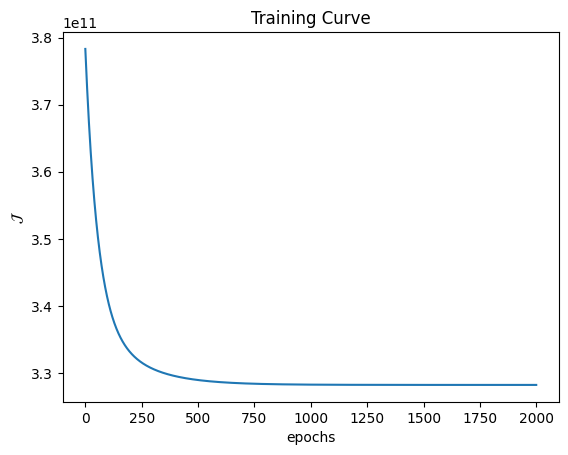

In [169]:
my_reg = MVLinearRegression()
my_reg.fit(X_train, y_train, eta=6e-3, epochs=2e3, show_curve=True)

In [170]:
X_train

,sold_price,sqrt_ft,lot_acres,Price_sq_ft_bins_new,bins
1,10.707134,3.045955,47.491295,0.070903,0.070903
3,11.654721,4.548502,17.641999,0.070903,0.070903
4,8.216399,2.255785,-0.023893,0.070903,0.070903
5,7.706439,2.645625,-0.066841,0.070903,0.070903
6,5.021608,7.175992,-0.054849,0.070903,0.070903
...,...,...,...,...,...
4335,-0.776049,-0.924125,-0.108951,0.070903,0.070903
4336,-0.790263,-0.892658,-0.100864,0.070903,0.070903
4337,-0.821849,-0.668893,-0.089709,0.070903,0.070903
4338,-0.837643,-0.709101,0.003995,0.070903,0.070903


In [171]:
y_hat = my_reg.predict(X_train)

In [173]:
y_hat

,0
1,3.393750e+06
3,3.688675e+06
4,2.597759e+06
5,2.436788e+06
6,1.590619e+06
...,...
4335,-2.457446e+05
4336,-2.502190e+05
4337,-2.600850e+05
4338,-2.650800e+05


In [172]:
y_train

,sold_price
1,4200000
3,4500000
4,3411450
5,3250000
6,2400000
...,...
4335,564500
4336,560000
4337,550000
4338,545000


In [174]:
MAE(y_train, y_hat)

4636.259326669227

In [175]:
R2(y_train, y_hat)

0.13227450284820164

In [176]:
OLS(y_train,y_hat, N=X_train.shape[0])

328205782829.1392